In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('../data/diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<br/><br/>

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 1
***
In the diabetes dataset above fit a Logistic Regression model(we'll learn in the next section about it, but for now just import it and fit it without any parameters defined) and using that as an estimator, fit an RFE model with 3 features.

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)

<br/><br/>

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 2
***
Now determine the selected features and also the ranking of the features

In [4]:
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


<br/><br/>

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 3
***
The above assignment does not enlist the features to be selected. Select all the column names and the selected features above and arrange them in their respective order appropriately. 

In [5]:
import operator
features = list(X.columns) # column names
scores = list(fit.support_) # scores of features
d = {}
d = dict(zip(features, scores))
sorted(d.items(), key=operator.itemgetter(1))


[('glucose', False),
 ('diastolic', False),
 ('triceps', False),
 ('insulin', False),
 ('age', False),
 ('pregnancies', True),
 ('bmi', True),
 ('dpf', True)]

<br/><br/>

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 4
***
Find the pearson correlation coefficient for all the features with the output variable in the diabetes dataset

In [6]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

for i in X.columns:
    print(pearsonr(X[i],y))

(0.2218981530339868, 5.065127298052554e-10)
(0.4665813983068741, 8.935431645287658e-43)
(0.06506835955033284, 0.07151390009774597)
(0.07475223191831938, 0.03834770482048333)
(0.13054795488404766, 0.0002861864603602735)
(0.2926946626444455, 1.2298074873114397e-16)
(0.17384406565296004, 1.2546070101485626e-06)
(0.2383559830271978, 2.2099754606650332e-11)


<br/><br/>

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 5
***
Plot a heatmap depicting the correlation between variables in the diabetes dataset

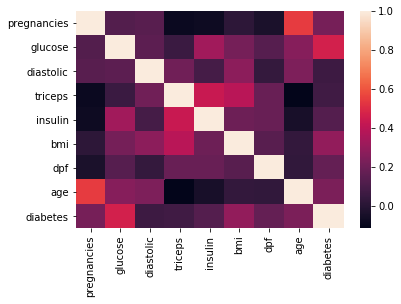

In [11]:
%matplotlib inline
import seaborn as sns
sns.heatmap(df.corr())